In [93]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
df=pd.read_csv('/content/Fertilizer Prediction.csv')
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


**Data Cleaning and Exploration**

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [96]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [97]:
df.shape

(99, 9)

In [98]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [99]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [100]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


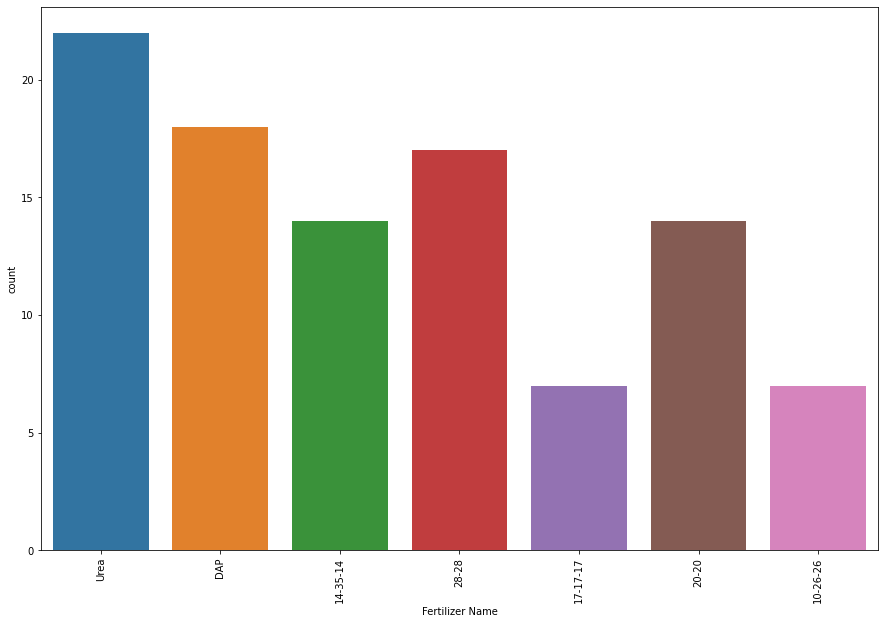

In [101]:
plt.figure(figsize=(15,10))
sns.countplot(df['Fertilizer Name'])
plt.xticks(rotation=90)
plt.show()

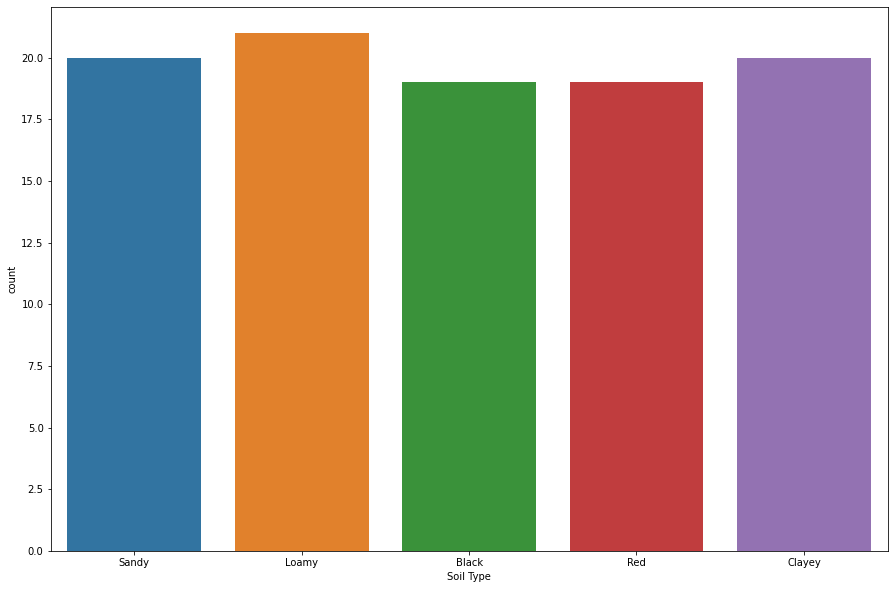

In [102]:
plt.figure(figsize=(15,10))
sns.countplot(x='Soil Type', data = df)
plt.show()

In [103]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [104]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

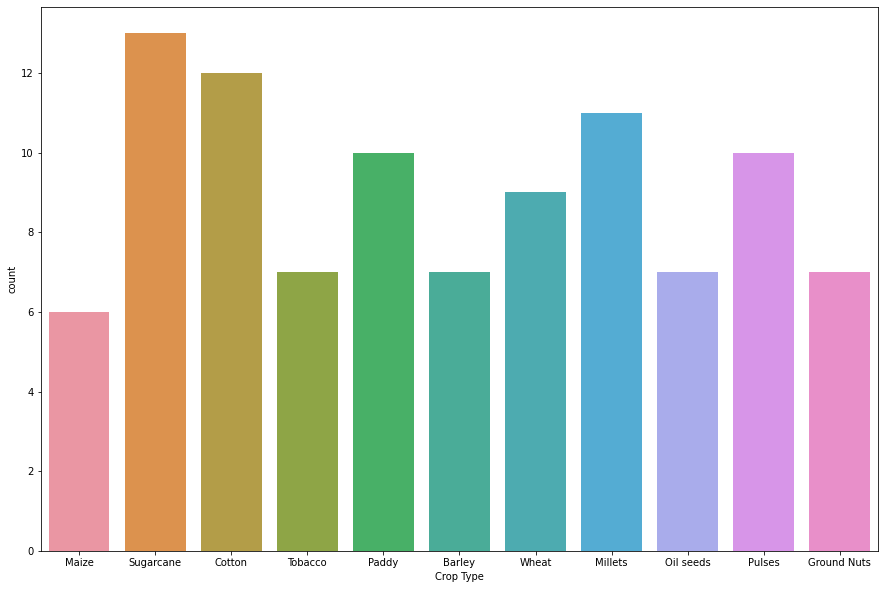

In [105]:
plt.figure(figsize=(15,10))
sns.countplot(x='Crop Type', data = df)

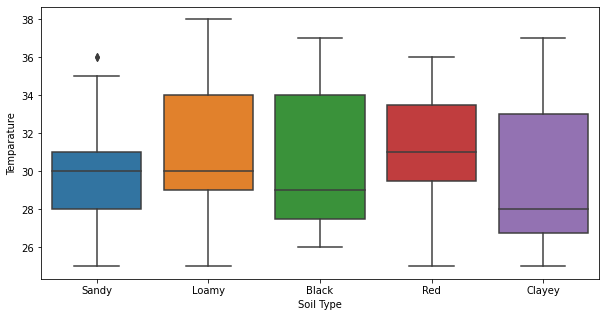

In [106]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

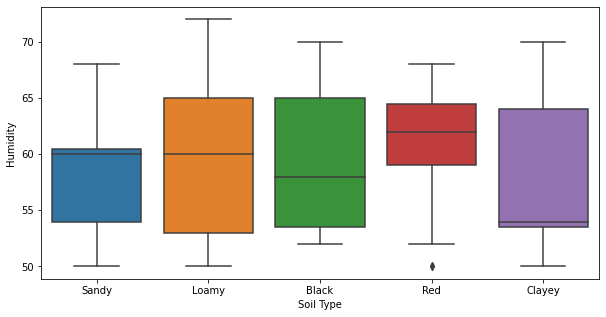

In [107]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'],y=df['Humidity '])

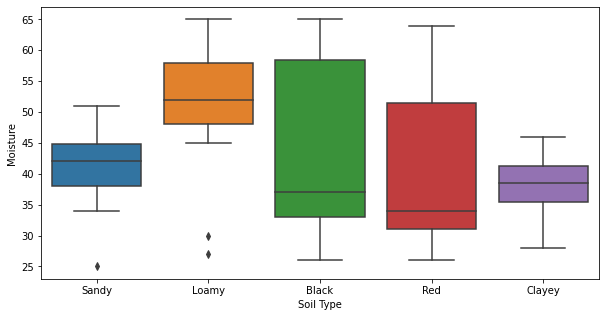

In [108]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'],y=df['Moisture'])

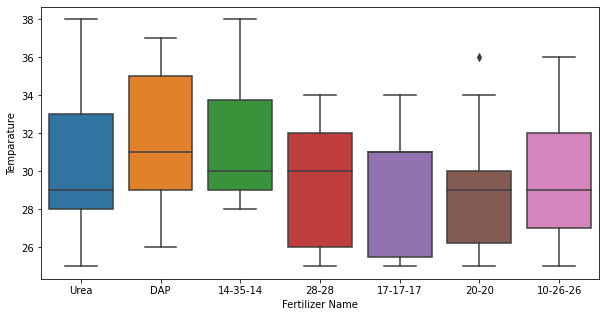

In [109]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Fertilizer Name'],y=df['Temparature'])

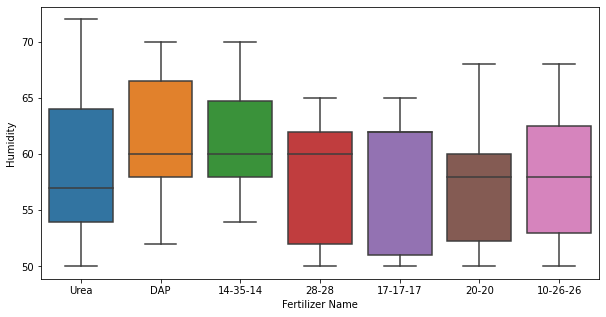

In [110]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Fertilizer Name'],y=df['Humidity '])

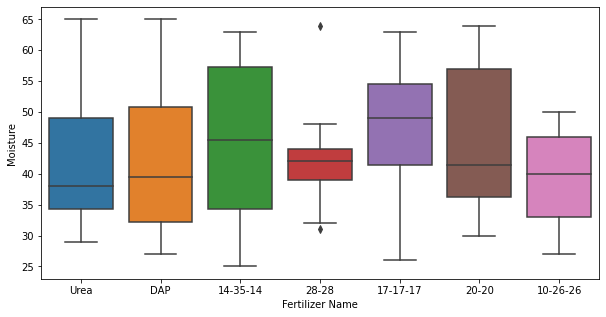

In [111]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Fertilizer Name'],y=df['Moisture'])

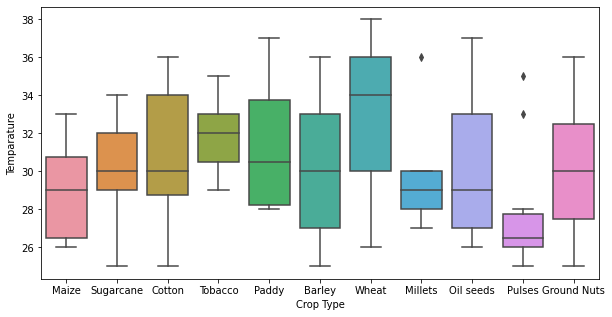

In [112]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])

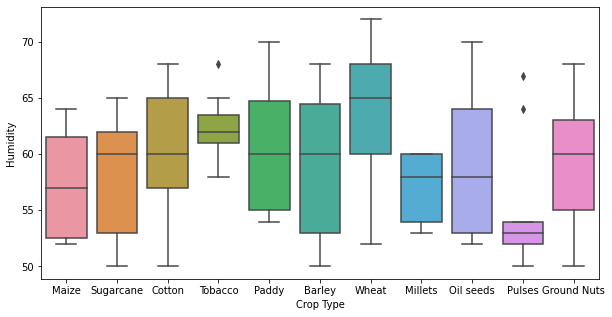

In [113]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Crop Type'],y=df['Humidity '])

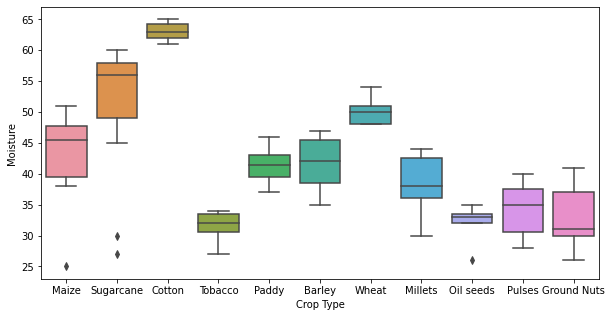

In [114]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Crop Type'],y=df['Moisture'])

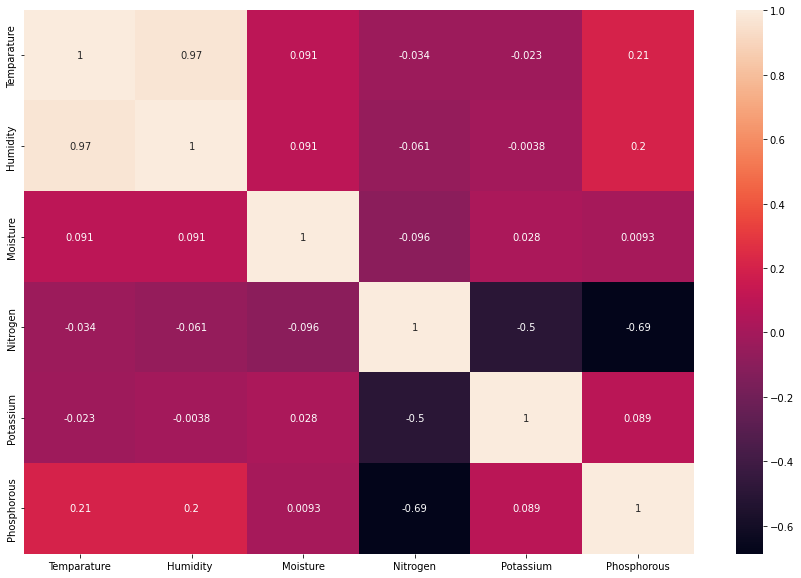

In [115]:
plt.figure(figsize=(15,10))
fig=df.corr()
sns.heatmap(fig,annot=True)

**Model Building**

In [116]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
encode1 = LabelEncoder()
encode2 = LabelEncoder()

In [117]:
df['Soil Type'] = encode.fit_transform(df['Soil Type'])
df['Crop Type'] = encode1.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = encode2.fit_transform(df['Fertilizer Name'])

In [118]:
Soil_Type = pd.DataFrame(zip(encode.classes_,encode.transform(encode.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [119]:
Crop_Type = pd.DataFrame(zip(encode1.classes_,encode1.transform(encode1.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [120]:
Fertilizer = pd.DataFrame(zip(encode2.classes_,encode2.transform(encode2.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [121]:
features = df[['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type','Nitrogen', 'Potassium', 'Phosphorous']]
target = df['Fertilizer Name']

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state = 42)

**Decision Tree**

In [136]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 30)), 'min_samples_split': [4,5,6,7],'max_depth':list(range(1,4))}

DT = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("The Accuracy of Decision Tree is: ",score*100)

Fitting 3 folds for each of 672 candidates, totalling 2016 fits
The Accuracy of Decision Tree is:  95.0


In [137]:
DT.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 7,
 'min_samples_split': 4}

**Random Forest**

In [125]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [4,8,12,16,20,25],
    'min_samples_split': [2, 3,4],
    'min_samples_leaf': [2,3,4],
    'n_estimators': [10,20,30]
}

rf = RandomForestClassifier()
RF= GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)
RF.fit(X_train, y_train)
y_pred1 = RF.predict(X_test)
score1 = accuracy_score(y_test, y_pred1)
print("The Accuracy of Random Forest is: ",score1*100)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
The Accuracy of Random Forest is:  95.0


In [126]:
RF.best_params_

{'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 20}

**Support Vector Machine**

In [127]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)
y_pred3=svm.predict(X_test)
score3 = accuracy_score(y_test, y_pred3)
print("The Accuracy of SVM is: ",score3*100)

The Accuracy of SVM is:  90.0


**Logistic Regression**

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [129]:
from sklearn.linear_model import LogisticRegression

logistic= LogisticRegression()
logistic.fit(X_train, y_train)
y_pred4=logistic.predict(X_test)
score4 = accuracy_score(y_test, y_pred4)

from sklearn.metrics import accuracy_score
print("The Accuracy of Logistic Regression is:", accuracy_score(y_test,y_pred4)*100)

The Accuracy of Logistic Regression is: 90.0


**Comparision of Model Accuracy**

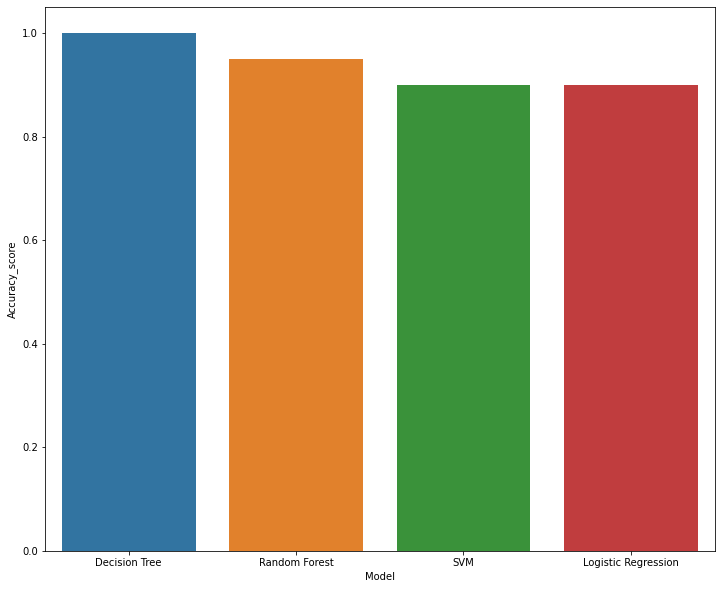

In [130]:
plt.figure(figsize=(12,10))
models = pd.DataFrame({
    'Model':[ 'Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression'],
    'Accuracy_score' :[score, score1, score3, score4]
})
models
sns.barplot(x='Model', y='Accuracy_score', data=models)

In [131]:
models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
0,Decision Tree,1.00
1,Random Forest,0.95
2,SVM,0.90
3,Logistic Regression,0.90


**Making Predictions**

In [132]:
data=np.array([[34,65,62	,0,	1,	7,	9,	30]])
prediction = RF.predict(data)
print(prediction)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [133]:
data=np.array([[32,62,34,3,	9,22,0,20]])
prediction = RF.predict(data)
print(prediction)

[4]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [134]:
data=np.array([[33,64,50,2,10,41,0,0]])
prediction = RF.predict(data)
print(prediction)

[6]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


**Saving The Model**

In [135]:
import pickle
pickle_out = open('fertilizer_recommedation.pkl','wb')
pickle.dump(RF,pickle_out)
pickle_out.close()

**Conclusion**

We can conclude that Random Forest and Decision Tree are the best performing algorithms showing an accuracy of 95 % followed by Support Vector Machine and Logistic Regression which shows 90 % accuracy.